In [1]:
import pandas as pd

df = pd.read_csv("kmean.csv")

df.info(), df.head() #displaying some basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      60 non-null     float64
 1   x2      60 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


(None,
        x1      x2
 0  24.412  32.932
 1  35.190  12.189
 2  26.288  41.718
 3   0.376  15.506
 4  26.116   3.963)

In [2]:
import numpy as np

df_normalized = (df - df.min()) / (df.max() - df.min())

data = df_normalized.to_numpy()

df_normalized.head()


,x1,x2
0,0.622452,0.666652
1,0.889776,0.198211
2,0.668982,0.865066
3,0.026291,0.273119
4,0.664716,0.012443


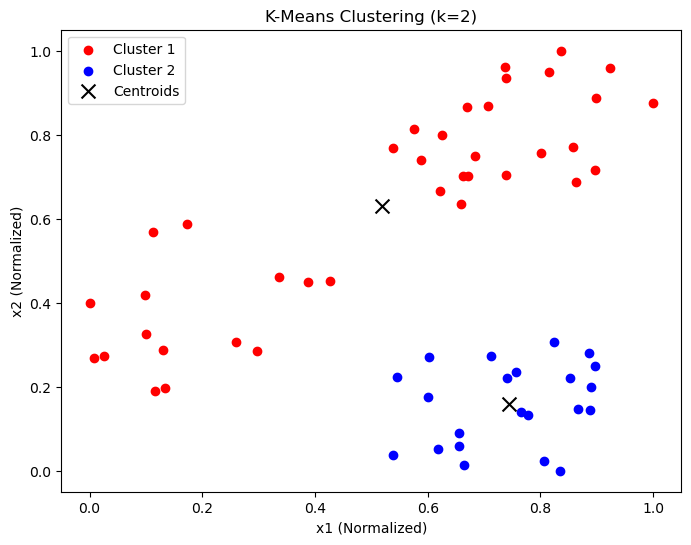

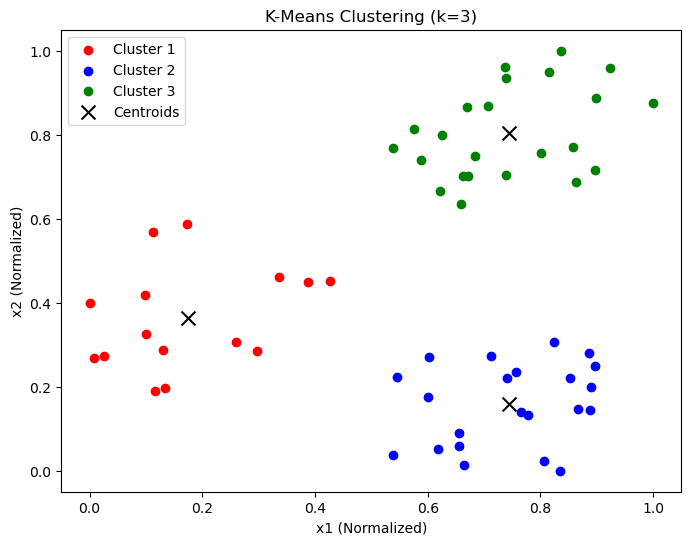

In [3]:
import matplotlib.pyplot as plt

# Function to calculate Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# K-Means Clustering Implementation
def k_means_clustering(data, k, max_iters=100, tol=1e-4):
    # Randomly initialize cluster centroids
    np.random.seed(42)
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for _ in range(max_iters):
        # Assign clusters based on closest centroid
        clusters = [[] for _ in range(k)]
        for point in data:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(point)

        # Convert lists to numpy arrays
        clusters = [np.array(cluster) for cluster in clusters]

        # Compute new centroids
        new_centroids = np.array([np.mean(cluster, axis=0) if len(cluster) > 0 else centroids[i] for i, cluster in enumerate(clusters)])

        # Check for convergence
        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    return clusters, centroids

# Function to plot clusters
def plot_clusters(clusters, centroids, k):
    colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k']
    plt.figure(figsize=(8, 6))
    
    for i, cluster in enumerate(clusters):
        plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i], label=f'Cluster {i+1}')
    
    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')
    
    plt.xlabel("x1 (Normalized)")
    plt.ylabel("x2 (Normalized)")
    plt.title(f"K-Means Clustering (k={k})")
    plt.legend()
    plt.show()

# Run K-means for k=2
clusters_k2, centroids_k2 = k_means_clustering(data, k=2)
plot_clusters(clusters_k2, centroids_k2, k=2)

# Run K-means for k=3
clusters_k3, centroids_k3 = k_means_clustering(data, k=3)
plot_clusters(clusters_k3, centroids_k3, k=3)
